<a href="https://colab.research.google.com/github/AjayINSE6220/Ajay_INSE_6220_Project-/blob/main/Raisin%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/AjayINSE6220/DATASET/main/Copy%20of%20Raisin_Dataset.csv')
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


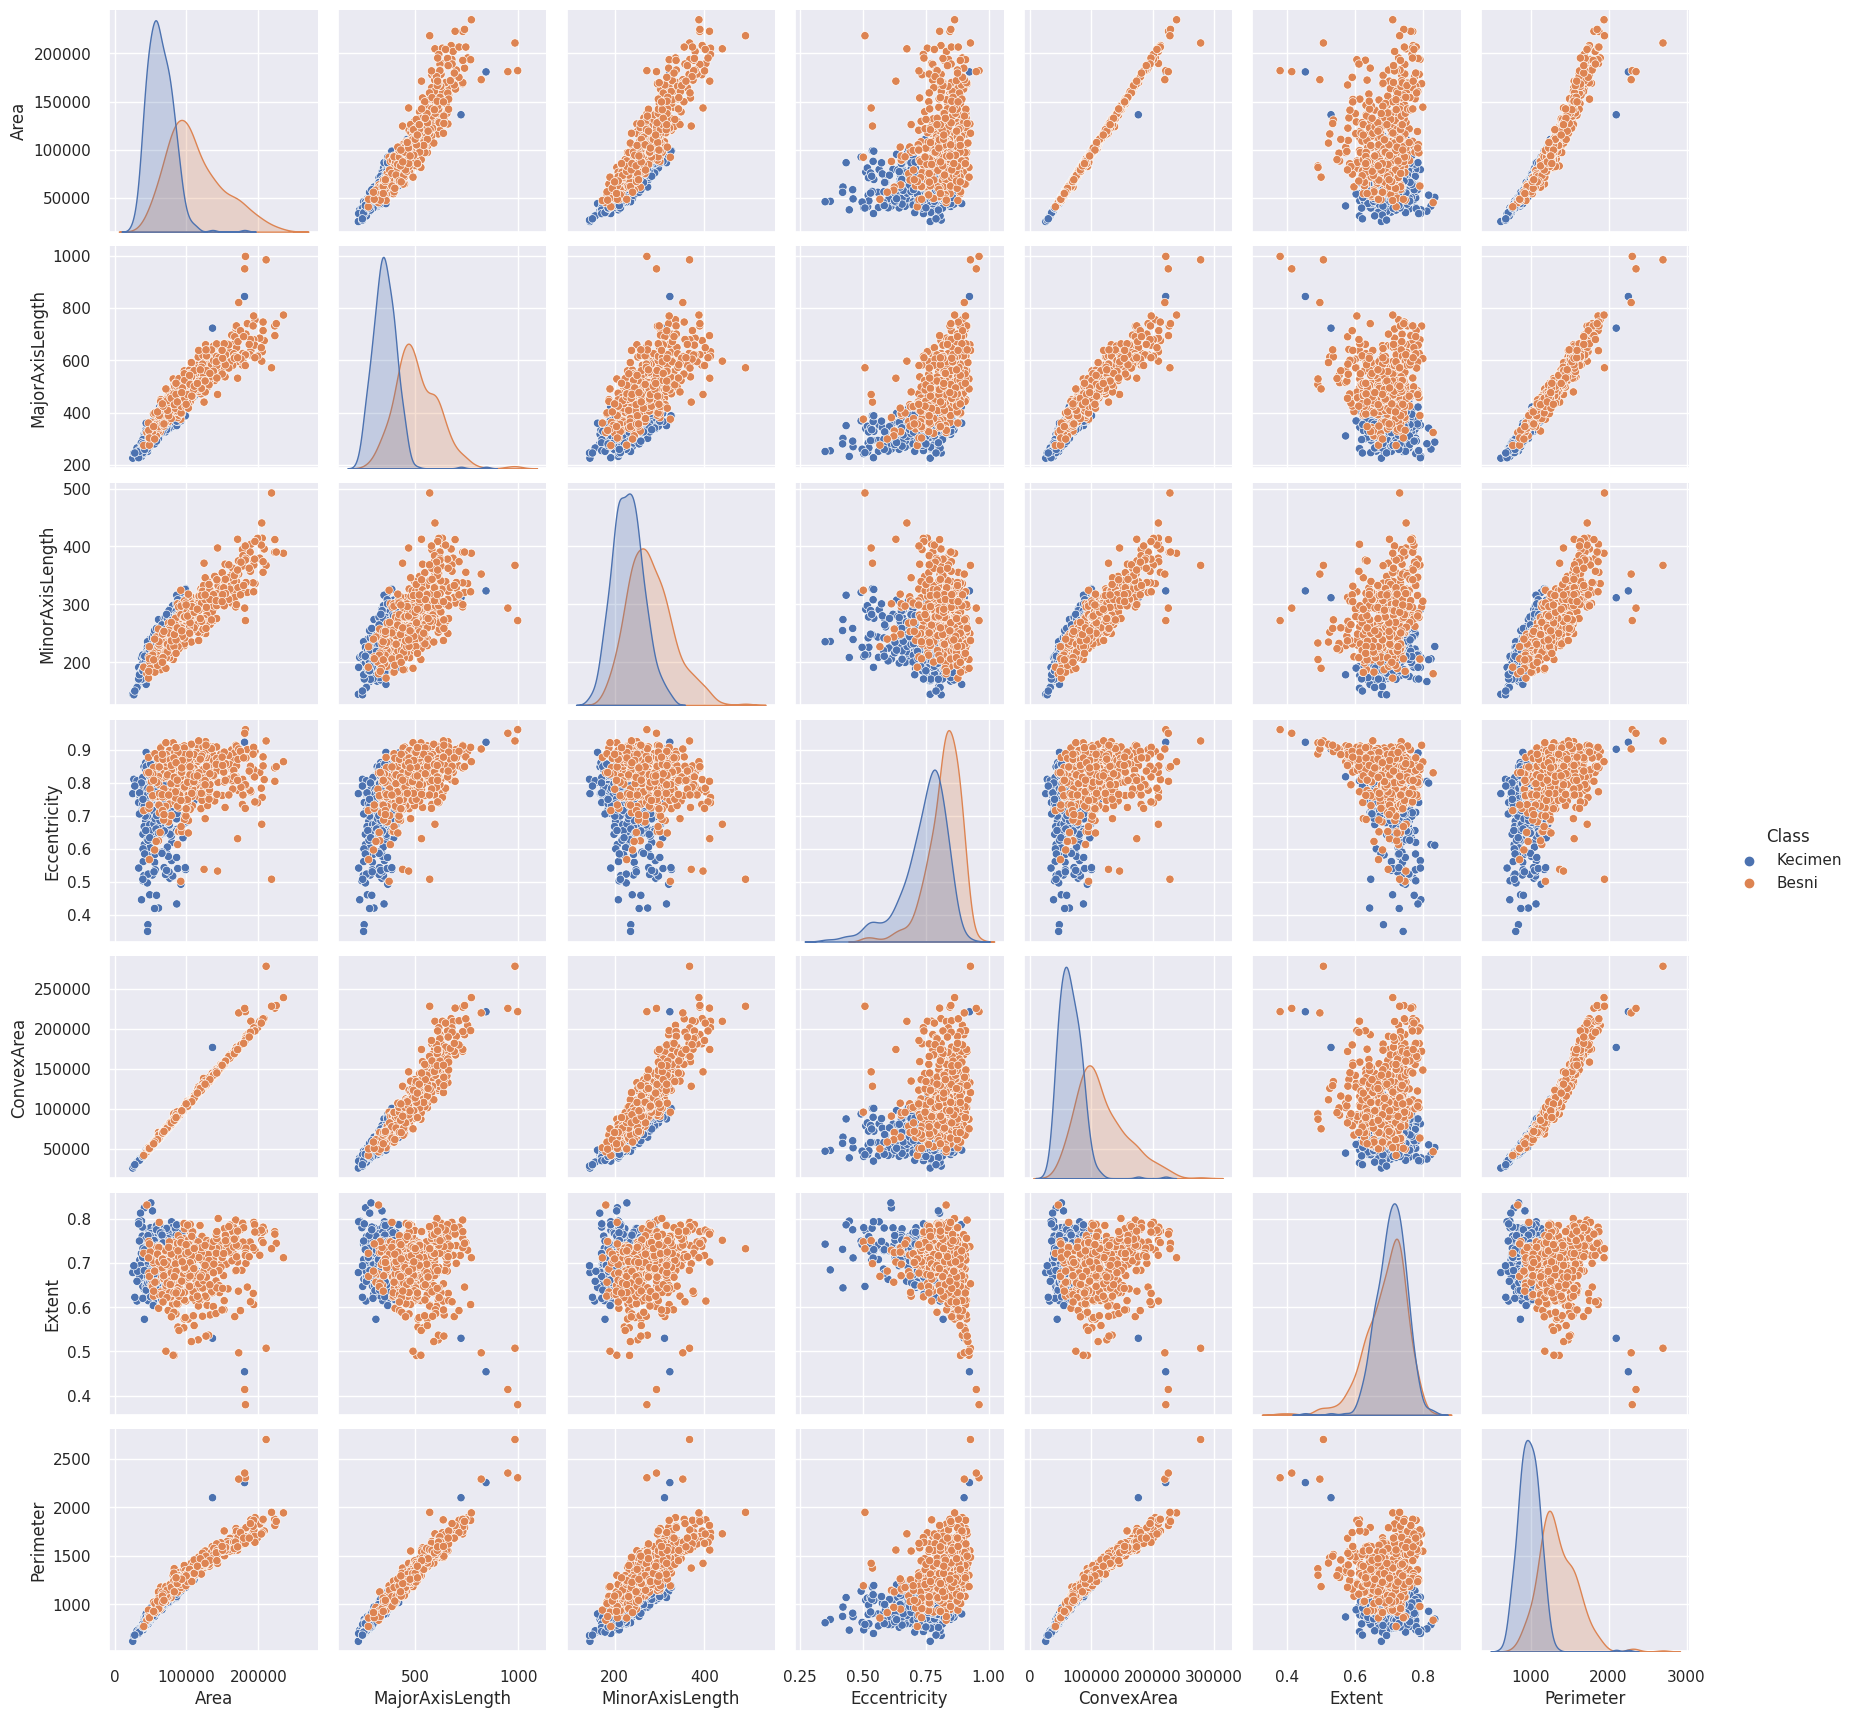

In [62]:
sns.pairplot(df, hue='Class')
plt.show()

In [63]:
X = df.drop(columns=['Class'])
X.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544


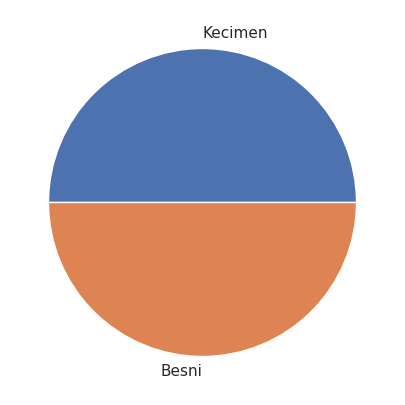

In [64]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [65]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [66]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639
5,-0.989269,-0.972699,-1.088166,-0.046427,-0.977212,-0.768202,-1.038224
6,-1.162433,-1.041504,-1.568353,0.460367,-1.160393,-0.629029,-1.250349
7,-0.688862,-0.849133,-0.381463,-0.836226,-0.708208,0.825066,-0.849891
8,-1.168487,-0.929031,-1.639519,0.708518,-1.139802,-0.027639,-1.155572
9,-0.600920,-0.551563,-0.534746,0.027845,-0.615047,-0.657433,-0.673810


In [67]:
observations = list(df.index)
variables = list(df.columns)

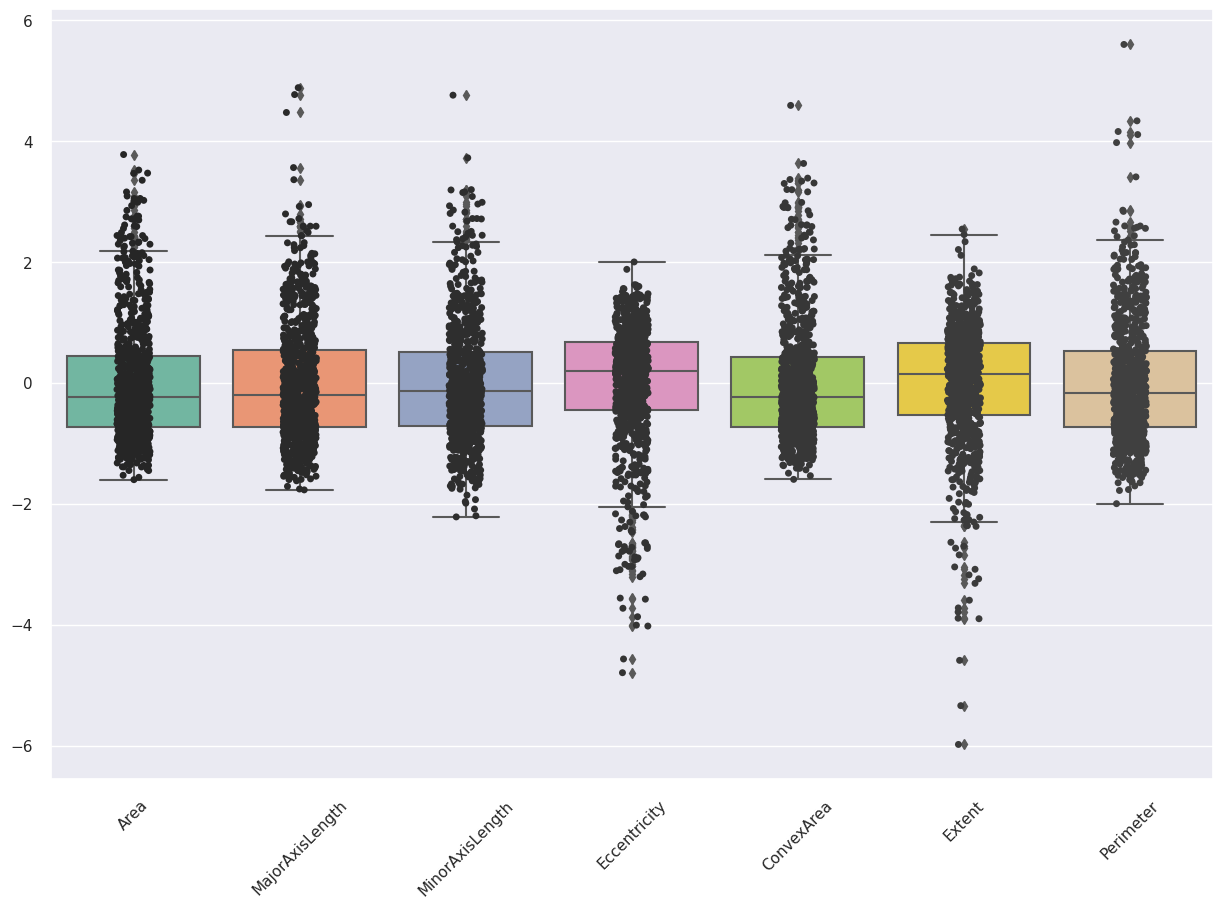

In [68]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

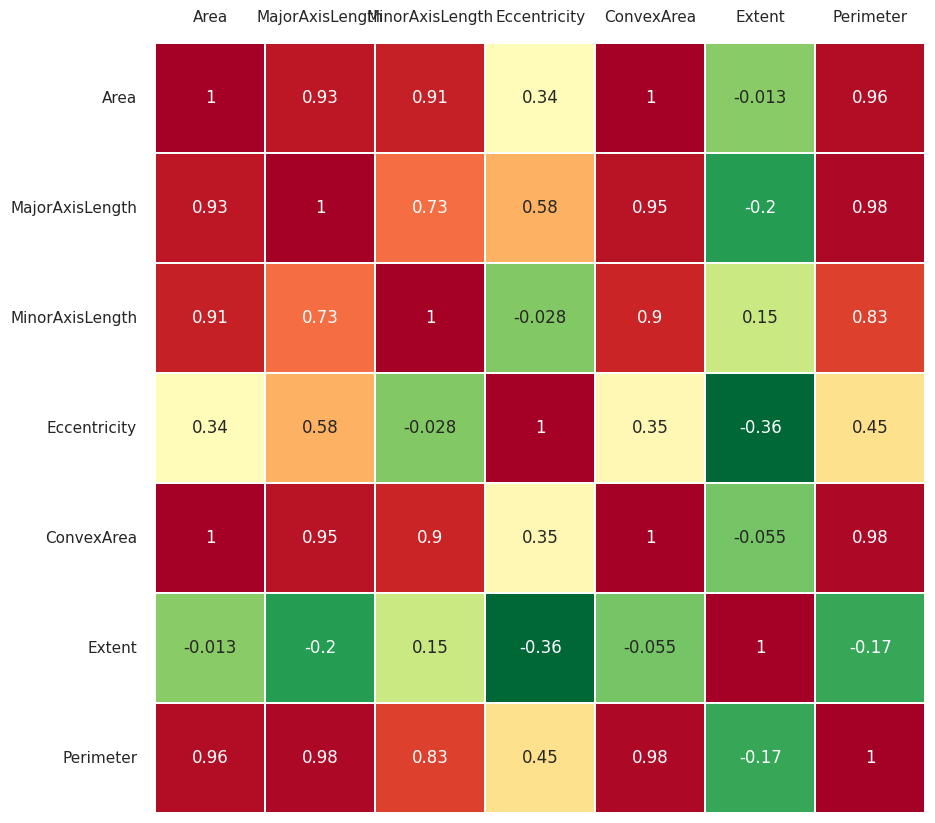

In [69]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

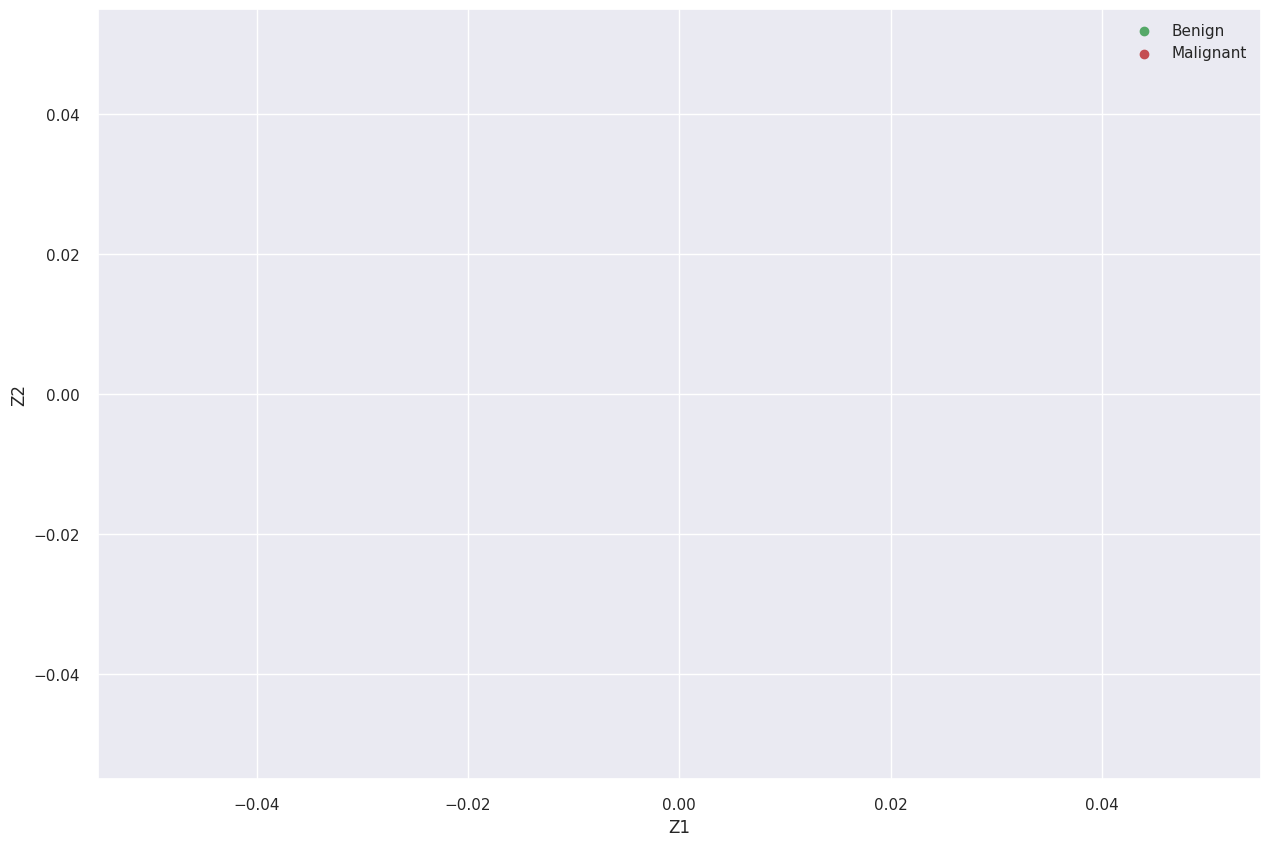

In [71]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.44828422, -0.11609991,  0.00548378, -0.11113906, -0.61104765,
        -0.09983439, -0.62436686],
       [ 0.4432398 ,  0.13658724, -0.10054797,  0.49520464,  0.08757032,
        -0.68557712,  0.22772863],
       [ 0.38938118, -0.37492246,  0.23604354, -0.6558767 ,  0.38457775,
        -0.2390332 ,  0.12995283],
       [ 0.20297098,  0.61082321, -0.62852206, -0.42629865,  0.07510412,
         0.05356014,  0.02044403],
       [ 0.45093833, -0.08761633,  0.0366724 ,  0.0558117 , -0.39241075,
         0.47120104,  0.63914127],
       [-0.05636836, -0.66734439, -0.73198093,  0.10905256,  0.05685884,
         0.02345199, -0.00161639],
       [ 0.45082374,  0.03417227,  0.04430077,  0.3398651 ,  0.5551508 ,
         0.48726906, -0.36399975]])

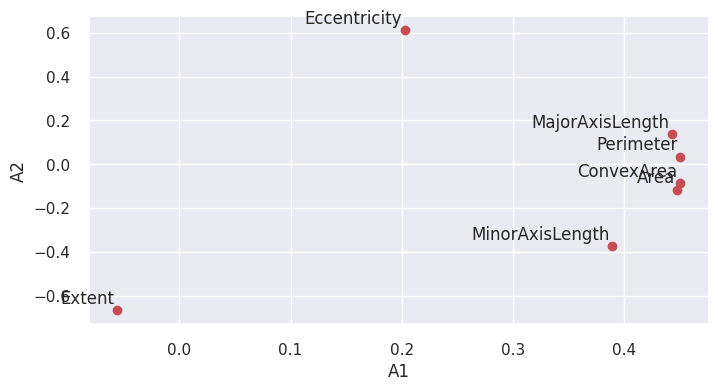

In [72]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([4.83766379e+00, 1.45480489e+00, 6.29148522e-01, 5.68877209e-02,
       2.18325269e-02, 6.43734371e-03, 1.01163378e-03])

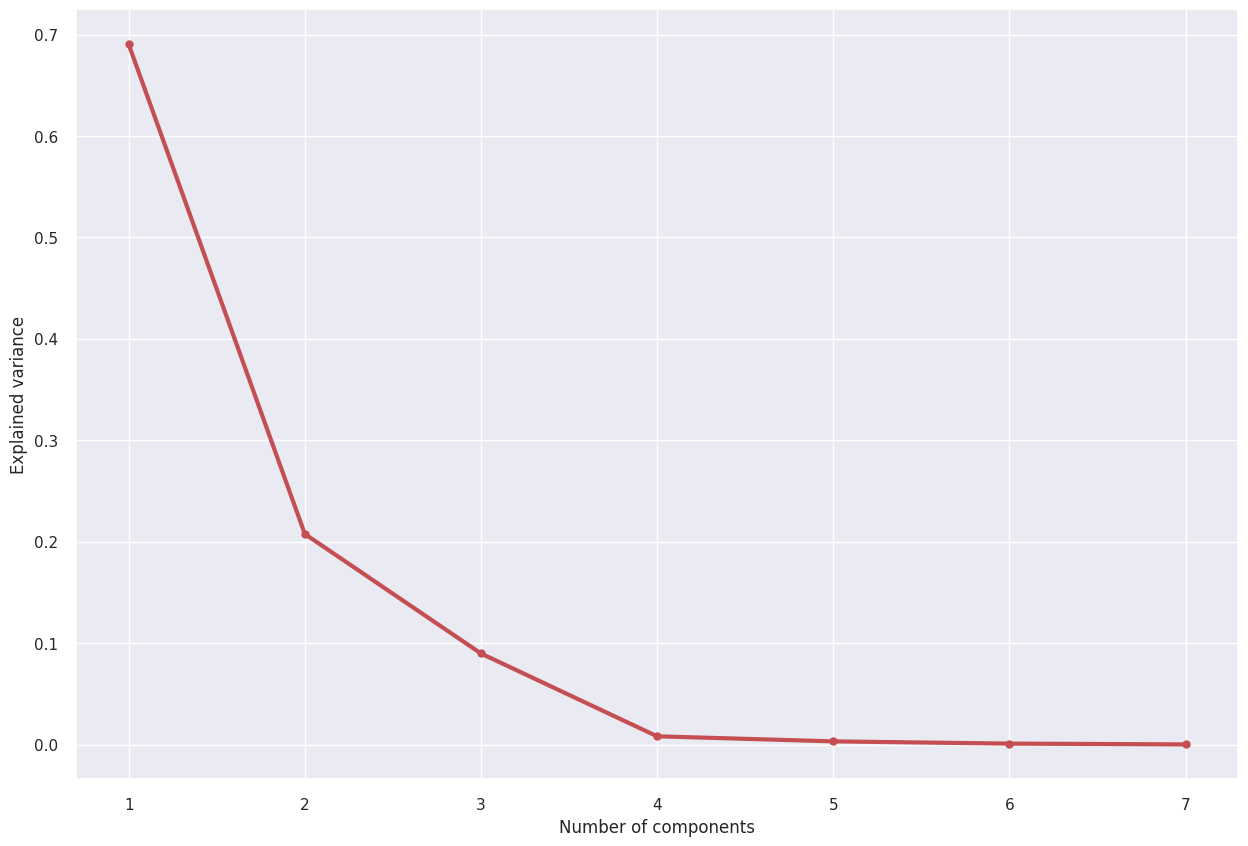

In [73]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

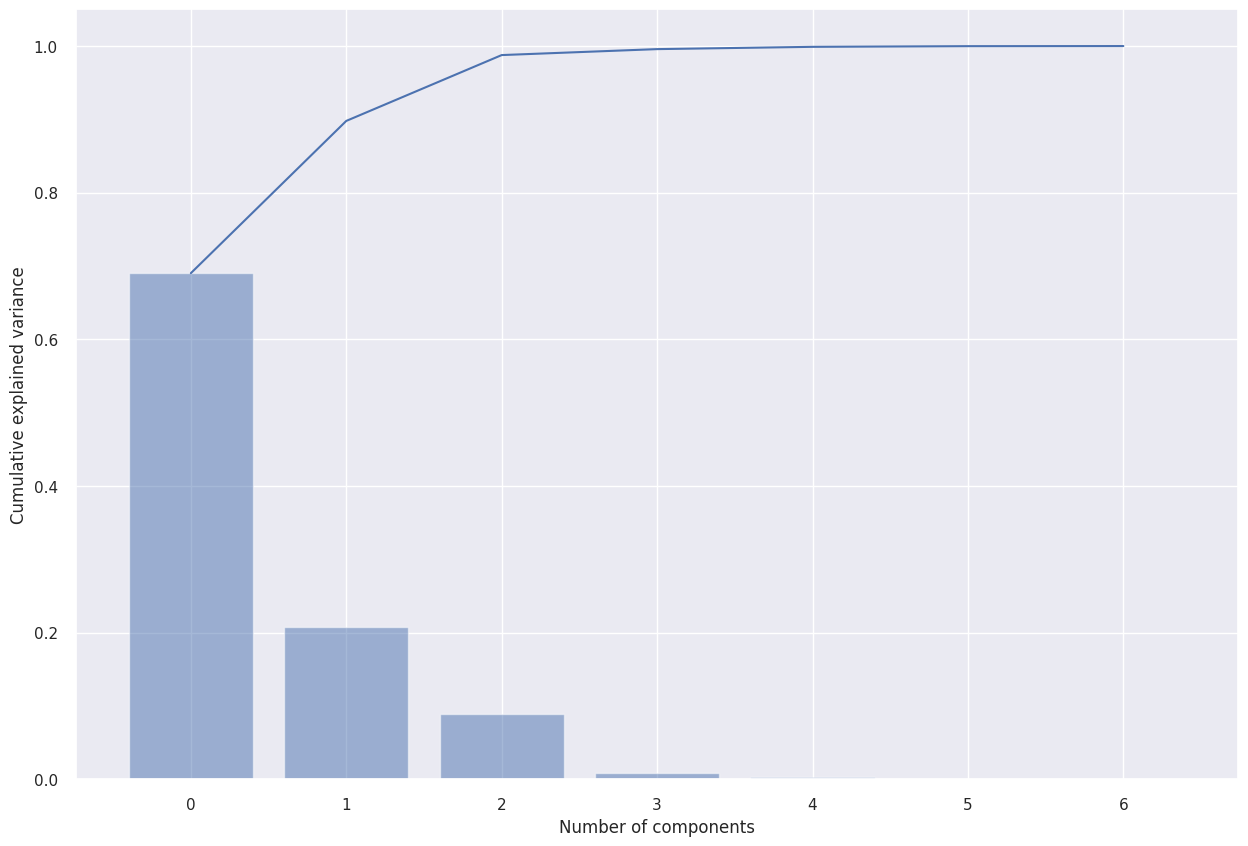

In [74]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [75]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [77]:
out['PC']

,PC1,PC2,PC3
0,0.076994,-0.453328,-1.089214
1,-0.475376,0.445368,0.016372
2,0.372109,0.802008,0.786487
3,-2.622445,-0.302564,0.482721
4,-0.962054,-2.967763,0.452154
...,...,...,...
895,-0.114629,0.694645,0.129914
896,0.273577,0.953934,0.696489
897,0.682451,-1.308199,0.091732
898,0.648410,0.979248,0.091413


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

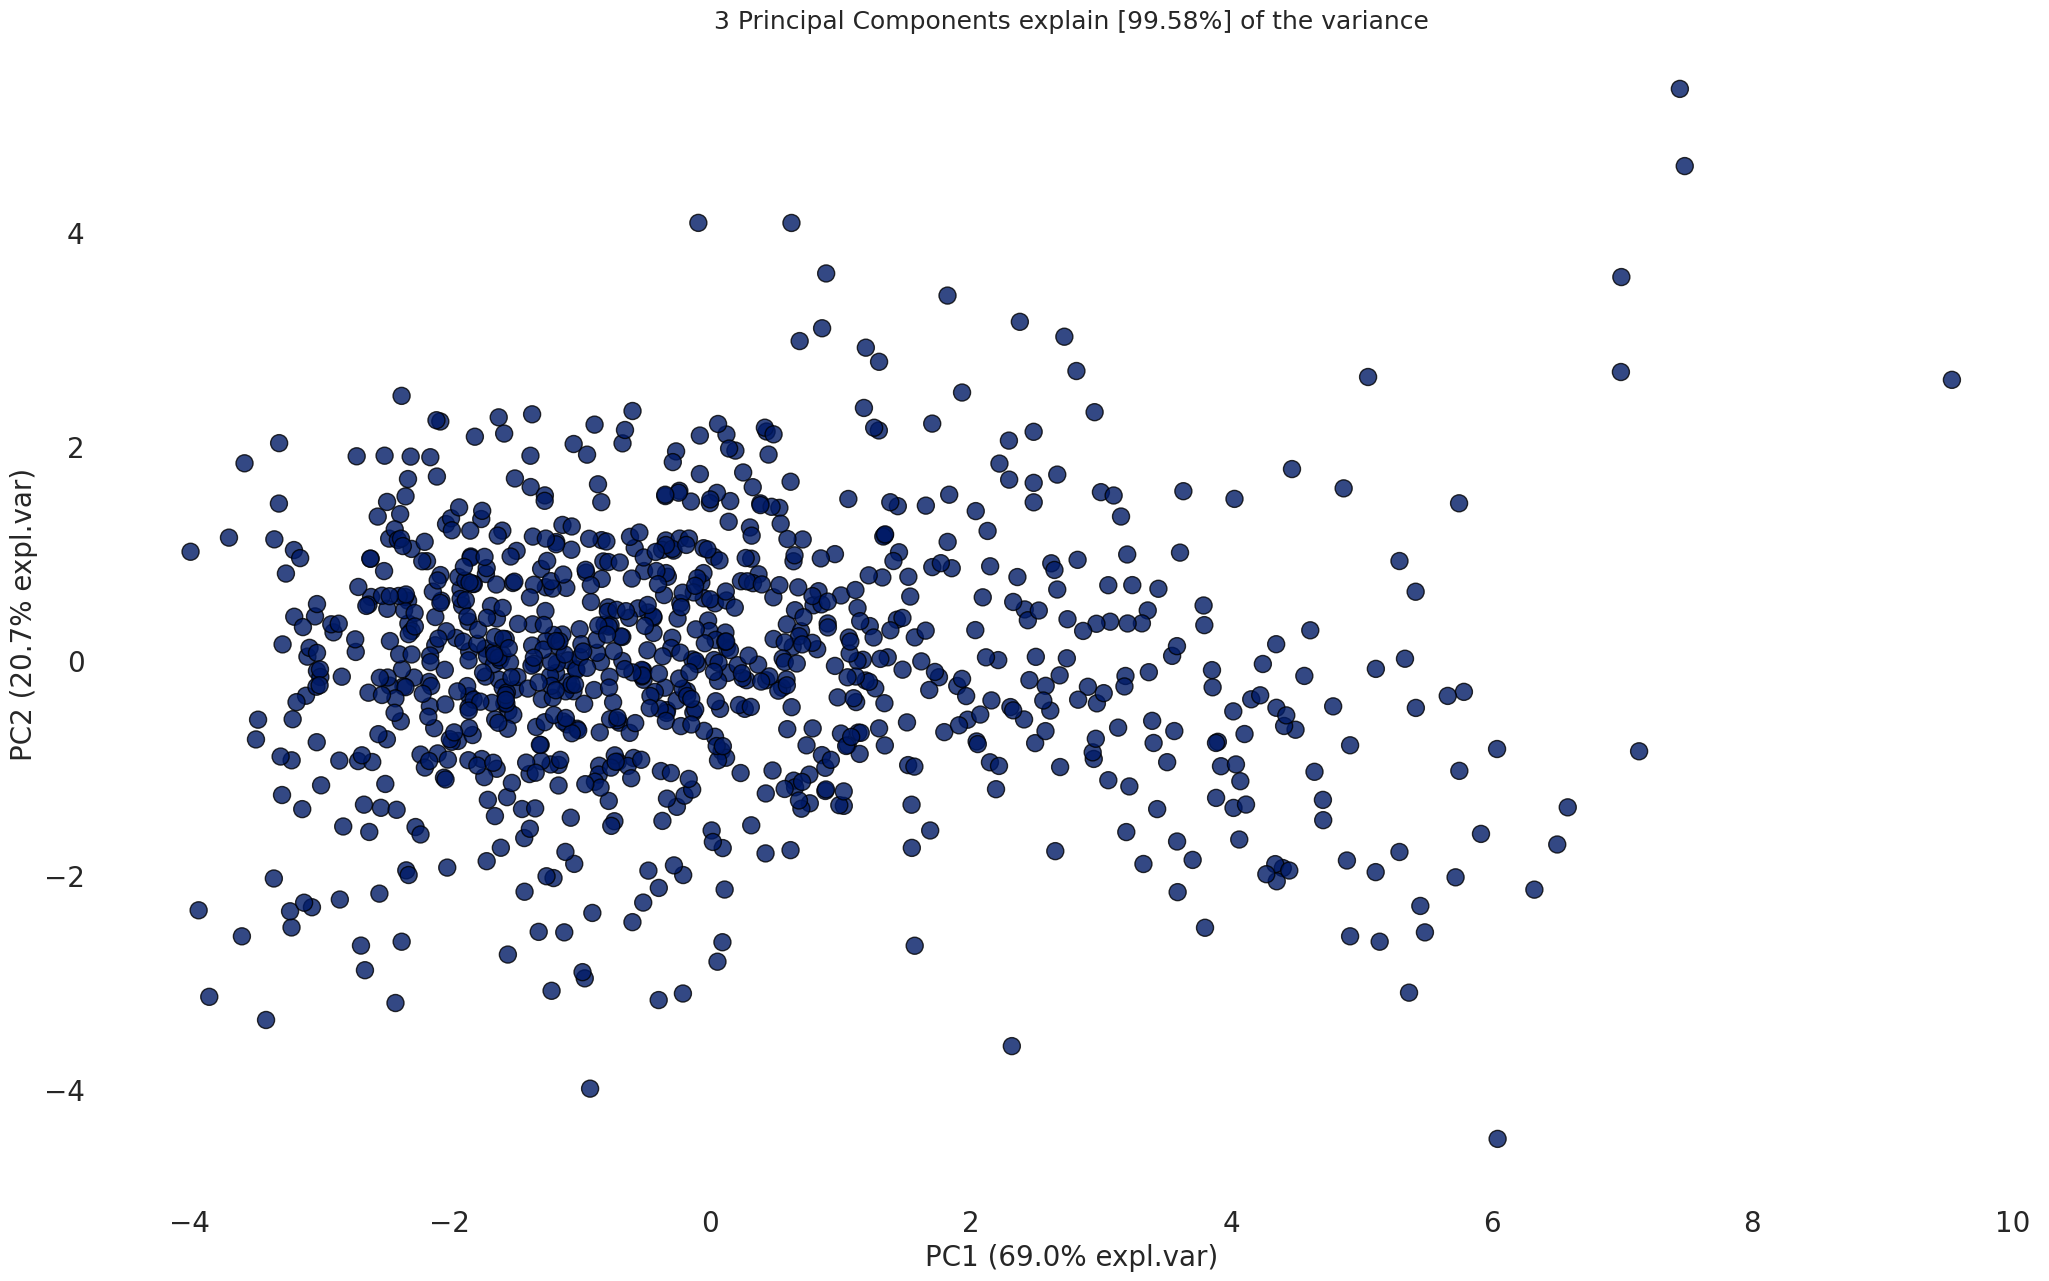

In [78]:
model.scatter(label=True, legend=False)

In [79]:
A = out['loadings'].T
A

,PC1,PC2,PC3
Area,0.448284,-0.116100,0.005484
MajorAxisLength,0.443240,0.136587,-0.100548
MinorAxisLength,0.389381,-0.374922,0.236044
Eccentricity,0.202971,0.610823,-0.628522
ConvexArea,0.450938,-0.087616,0.036672
Extent,-0.056368,-0.667344,-0.731981
Perimeter,0.450824,0.034172,0.044301


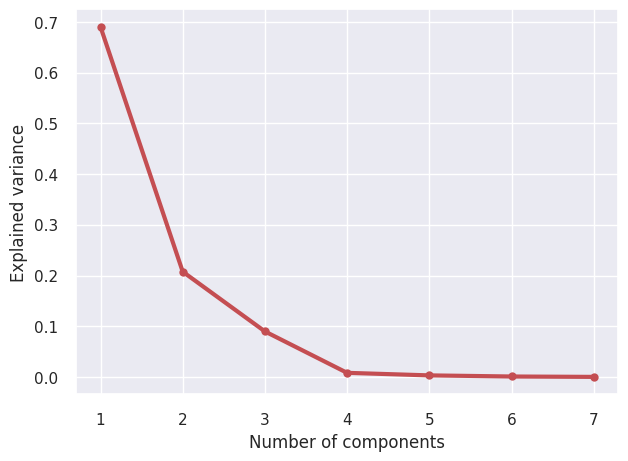

In [80]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [81]:
from pycaret.utils import version
version()

'3.0.0'

In [82]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [85]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Target mapping,"Besni: 0, Kecimen: 1"
4,Original data shape,"(810, 8)"
5,Transformed data shape,"(810, 8)"
6,Transformed train set shape,"(567, 8)"
7,Transformed test set shape,"(243, 8)"
8,Numeric features,7
9,Preprocess,True


In [86]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8781,0.0000,0.9018,0.8663,0.8817,0.7560,0.7605,0.0550
lda,Linear Discriminant Analysis,0.8781,0.9364,0.8983,0.8684,0.8813,0.7560,0.7598,0.0730
lr,Logistic Regression,0.8693,0.9369,0.8913,0.8587,0.8726,0.7384,0.7426,0.5720
rf,Random Forest Classifier,0.8675,0.9204,0.9158,0.8406,0.8752,0.7347,0.7407,0.6850
qda,Quadratic Discriminant Analysis,0.8623,0.9293,0.9543,0.8110,0.8759,0.7239,0.7379,0.0700
lightgbm,Light Gradient Boosting Machine,0.8604,0.9131,0.8807,0.8519,0.8649,0.7206,0.7229,0.2310
gbc,Gradient Boosting Classifier,0.8534,0.9154,0.8983,0.8312,0.8619,0.7064,0.7118,0.3370
et,Extra Trees Classifier,0.8534,0.9227,0.8948,0.8314,0.8613,0.7065,0.7098,0.6460
xgboost,Extreme Gradient Boosting,0.8516,0.9107,0.8874,0.8371,0.8590,0.7027,0.7088,0.1730
ada,Ada Boost Classifier,0.8499,0.9081,0.9089,0.8212,0.8606,0.6994,0.7080,0.2680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]